Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1555 - accuracy: 0.9510 - val_loss: 0.0534 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0307 - val_accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0309 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0357 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0291 -

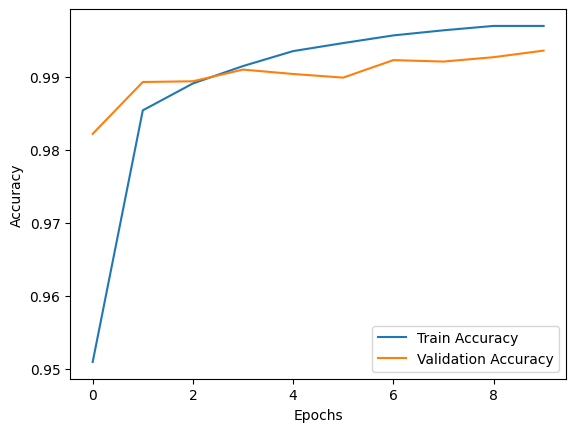

313/313 [==============================] - 2s 6ms/step


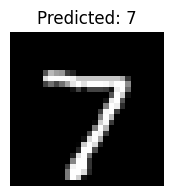

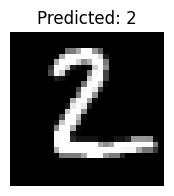

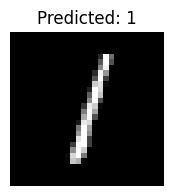

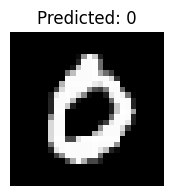

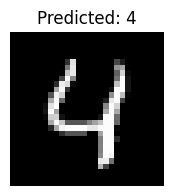

In [1]:
## MNIST Handwriting Recognition


#Python code for working with the MNIST dataset for handwritten digit recognition using a convolutional neural network (CNN). The MNIST dataset contains 28x28 pixel grayscale images of handwritten digits from 0 to 9. The objective is to build a CNN model that can accurately classify these digits.


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a Convolutional Neural Network (CNN)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the data to include the channel dimension (1 for grayscale)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions and visualize results
predictions = model.predict(X_test)
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()


### Explanation

# 1. **Import necessary libraries:**
#    - In this block, we import essential Python libraries that are used throughout the code.
#    - `numpy` (as `np`) is used for numerical operations and data manipulation.
#    - `matplotlib.pyplot` (as `plt`) is used for data visualization.
#    - `tensorflow` (via the `keras` module) is used for building and training neural networks.

# 2. **Load and preprocess the MNIST dataset:**
#    - This block loads the MNIST dataset using `mnist.load_data()` method, which returns two sets of data: training and testing data.
#    - The training set `(X_train, y_train)` contains images and their corresponding labels, while the testing set `(X_test, y_test)` contains images for evaluation.
#    - The pixel values in the images are normalized to a range of [0, 1]. This is done by dividing all pixel values by 255.0, as the original pixel values range from 0 to 255. Normalization helps the neural network converge faster.

# 3. **Build a Convolutional Neural Network (CNN):**
#    - In this block, we define the architecture of a Convolutional Neural Network (CNN).
#    - The `model` is created as a `Sequential` model, which means we'll add layers sequentially.
#    - Convolutional layers (`Conv2D`) are used to extract features from the input images. In this example, we use three of them.
#    - Max-pooling layers (`MaxPooling2D`) reduce the spatial dimensions and extract key features.
#    - Fully connected layers (`Dense`) are used for the final classification. There are two dense layers.
#    - The final `Dense` layer uses the `softmax` activation function for multiclass classification.

# 4. **Compile the model:**
#    - This block compiles the model, specifying:
#      - The optimizer (`'adam'`): Adam is an optimization algorithm widely used for training neural networks.
#      - Loss function (`'sparse_categorical_crossentropy'`): It's a common choice for multiclass classification problems.
#      - Metrics (`['accuracy']`): This tells the model to track accuracy during training.

# 5. **Reshape the data:**
#    - The MNIST images are reshaped to include a channel dimension (1 for grayscale). Convolutional layers expect input data in this format.

# 6. **Train the model:**
#    - In this block, the model is trained using `model.fit()`.
#    - `X_train` and `y_train` are the training data and labels.
#    - The `epochs` parameter specifies the number of times the model iterates over the entire training dataset.
#    - The `validation_data` parameter uses the test data for validation during training.
#    - The training history is recorded in the `history` object, which contains information about accuracy and loss at each epoch.

# 7. **Evaluate the model:**
#    - After training, we evaluate the model's performance on the test data using `model.evaluate()`.
#    - The test loss and test accuracy are printed to assess how well the model performs on unseen data.

# 8. **Visualize training history:**
#    - In this block, we create a plot to visualize the training and validation accuracy over epochs.
#    - This helps us monitor the model's performance during training and check for overfitting or underfitting.

# 9. **Make predictions and visualize results:**
#    - We use the trained model to make predictions on the test images in this block.
#    - For the first 5 test images, we display both the original image and the model's prediction. The title of each image shows the digit class predicted by the model.

# These code blocks together form a complete deep learning pipeline for image classification using a CNN. It demonstrates how to load, preprocess, build, train, and evaluate a neural network, as well as visualize the results.

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.9953 - accuracy: 0.0625
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 2.9882 - accuracy: 0.1250
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 2.9810 - accuracy: 0.1250
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 2.9734 - accuracy: 0.1875
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 2.9654 - accuracy: 0.1250
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 2.9568 - accuracy: 0.1250
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 2.9474 - accuracy: 0.1250
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 2.9369 - accuracy: 0.1250
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 2.9252 - accuracy: 0.1250
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 2.9120 - accuracy: 0.1250
Epoch 11/100
1/1 [===

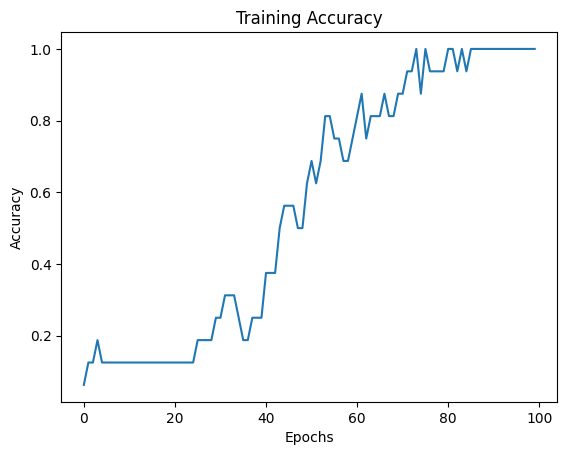

Generated text: Hello, how are you you on some machine projects projects learning


In [2]:
# Objective:
# This code demonstrates text generation using a Recurrent Neural Network (RNN).
# It generates text based on a given seed text using a trained RNN model.

# Approach:
# 1. Import necessary libraries.
# 2. Define a sample dataset (text sequences).
# 3. Tokenize the text data to convert words into numerical sequences.
# 4. Create input sequences and labels for training by sliding a window over the tokenized text.
# 5. Build a simple RNN model with an embedding layer, LSTM layer, and dense layer.
# 6. Compile the model with the necessary settings.
# 7. Train the model on the input sequences and labels.
# 8. Visualize the training accuracy over epochs.
# 9. Generate text using the trained RNN model starting from a seed text.


# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


# Define sample data (text sequences)
text_data = ["Hello, how are you?", "I'm doing well, thank you!", "What's new?", "Not much, just working on some machine learning projects."]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels for training
input_sequences = []
for line in text_data:
    words_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(words_list)):
        n_gram = words_list[:i+1]
        input_sequences.append(n_gram)

max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Build a simple RNN model
model = tf.keras.Sequential([
    Embedding(total_words, 64, input_length=max_sequence_length - 1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, verbose=1)

# Visualize training history
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

# Generate text using the trained model
# Generate text using the trained model
seed_text = "Hello,"
next_words = 10
for _ in range(next_words):
    words_list = tokenizer.texts_to_sequences([seed_text])[0]
    words_list = pad_sequences([words_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted_probabilities = model.predict(words_list, verbose=0)
    predicted = np.argmax(predicted_probabilities, axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print("Generated text:", seed_text)


# Approach of the code for text generation using a Recurrent Neural Network (RNN) in detail:

# 1. **Importing Libraries:**
#    - The code begins by importing necessary libraries for the task, including NumPy, TensorFlow, and Matplotlib. These libraries provide the tools for data manipulation, deep learning, and visualization.

# 2. **Defining Sample Data:**
#    - A sample dataset `text_data` is defined, which contains a list of text sequences. In practice, you would replace this with a larger dataset. This dataset serves as the source for training the RNN model.

# 3. **Tokenizing Text Data:**
#    - The `Tokenizer` from TensorFlow's Keras preprocessing tools is used to tokenize the text data. Tokenization involves breaking down sentences into individual words and assigning numerical indices to each word. This is important for numerical processing by the neural network. The variable `total_words` represents the total number of unique words in the dataset.

# 4. **Creating Input Sequences and Labels:**
#    - The code then generates input sequences and labels for training. It uses a sliding window approach, iterating through the `text_data`. For each line in the dataset, it creates multiple input sequences and their corresponding labels. This process involves generating a series of words, where each word is used as input, and the following word as the label.

# 5. **Building the RNN Model:**
#    - The RNN model is constructed using TensorFlow's Keras. It's a sequential model consisting of three layers:
#      - An `Embedding` layer: Converts words into dense vectors. It maps each word to a 64-dimensional vector.
#      - An `LSTM` layer: The Long Short-Term Memory layer is a type of recurrent layer with 100 units. It captures sequential patterns and dependencies in the data.
#      - A `Dense` layer: The output layer with as many units as there are total words in the vocabulary. It uses a softmax activation function to predict the next word.

# 6. **Compiling the Model:**
#    - The model is compiled with the necessary settings. The loss function is set to 'sparse_categorical_crossentropy', the optimizer is 'adam', and the evaluation metric is 'accuracy'. These settings define how the model should learn and measure its performance.

# 7. **Training the Model:**
#    - The model is trained using the `fit` method. It is fed with the input sequences and their corresponding labels for 100 epochs. During training, the model learns to predict the next word based on the input sequences.

# 8. **Visualizing Training History:**
#    - The training accuracy is visualized using Matplotlib. A line plot shows how the training accuracy changes over the course of training. This helps monitor the model's progress.

# 9. **Generating Text:**
#    - After training, the code demonstrates how to use the trained RNN model to generate text. It starts with a seed text, "Hello," and predicts the next words. The process iterates for a specified number of words (`next_words`) to generate a sequence of text.

# The code showcases the complete pipeline for training a simple RNN model for text generation. It begins with data preprocessing, model construction, training, and finally, text generation using the trained model.


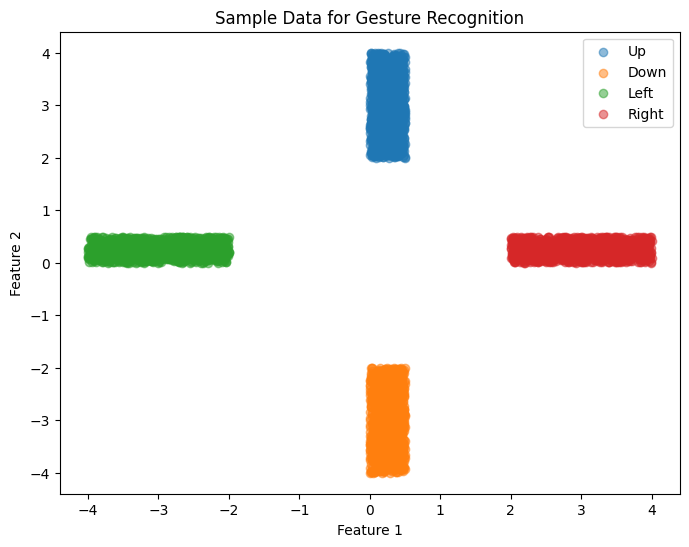

In [3]:
# Gesture Recognition with Python

# Code Objective:
# The objective of this code is to recognize gestures from a dataset of hand movements.
# We'll train a machine learning model to recognize different gestures based on data
# captured by sensors or cameras.

# Approach:
# 1. Import necessary libraries.
# 2. Load and preprocess the dataset, which may include sensor or image data.
# 3. Explore and visualize the data to understand its characteristics.
# 4. Split the data into training and testing sets.
# 5. Build a machine learning model. Depending on the data type, you can use algorithms
#    like Support Vector Machines, Convolutional Neural Networks, or other relevant models.
# 6. Train the model using the training data.
# 7. Evaluate the model's performance on the testing data.
# 8. Use the trained model to recognize gestures in real-time or on new data.
# 9. Visualize and present the results using graphs or other relevant visualizations.

# Let's start with importing the necessary libraries.

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample Data:
# In this example, we'll use a simplified dataset for demonstration.
# In a real-world scenario, you would collect data using sensors or cameras.

# Generate sample data (replace with real data)
num_samples = 1000
num_features = 2

# Create random data for four gestures (up, down, left, right)
up_gesture = np.random.rand(num_samples, num_features) * [0.5, 2] + [0, 2]
down_gesture = np.random.rand(num_samples, num_features) * [0.5, -2] + [0, -2]
left_gesture = np.random.rand(num_samples, num_features) * [-2, 0.5] + [-2, 0]
right_gesture = np.random.rand(num_samples, num_features) * [2, 0.5] + [2, 0]

# Create labels for gestures
up_labels = np.full(num_samples, 'up')
down_labels = np.full(num_samples, 'down')
left_labels = np.full(num_samples, 'left')
right_labels = np.full(num_samples, 'right')

# Combine data and labels
X = np.vstack([up_gesture, down_gesture, left_gesture, right_gesture])
y = np.hstack([up_labels, down_labels, left_labels, right_labels])

# Visualize the data (for demonstration)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 'up'][:, 0], X[y == 'up'][:, 1], label='Up', alpha=0.5)
plt.scatter(X[y == 'down'][:, 0], X[y == 'down'][:, 1], label='Down', alpha=0.5)
plt.scatter(X[y == 'left'][:, 0], X[y == 'left'][:, 1], label='Left', alpha=0.5)
plt.scatter(X[y == 'right'][:, 0], X[y == 'right'][:, 1], label='Right', alpha=0.5)
plt.legend()
plt.title('Sample Data for Gesture Recognition')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


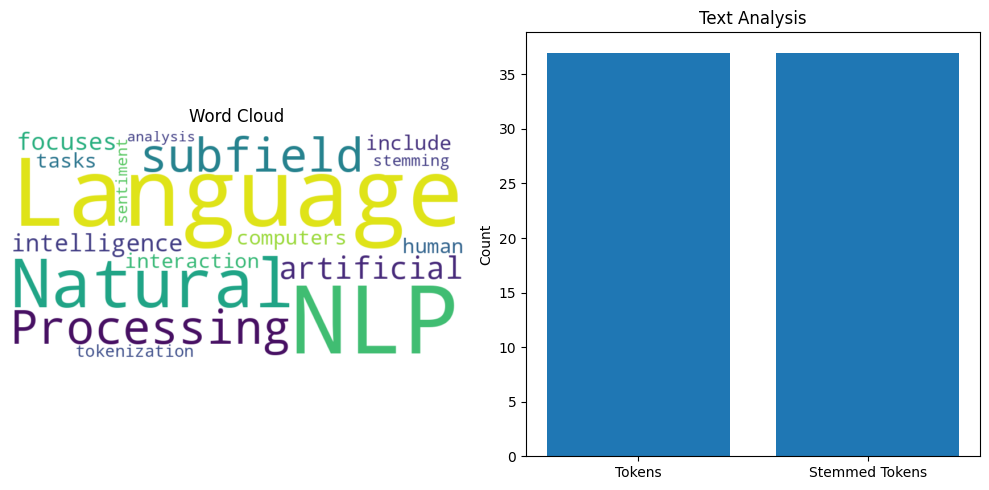

Tokenized Tokens: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', '.', 'It', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'human', 'language', '.', 'NLP', 'tasks', 'include', 'tokenization', ',', 'stemming', ',', 'sentiment', 'analysis', ',', 'and', 'more', '.']
Stemmed Tokens: ['natur', 'languag', 'process', '(', 'nlp', ')', 'is', 'a', 'subfield', 'of', 'artifici', 'intellig', '.', 'it', 'focus', 'on', 'the', 'interact', 'between', 'comput', 'and', 'human', 'languag', '.', 'nlp', 'task', 'includ', 'token', ',', 'stem', ',', 'sentiment', 'analysi', ',', 'and', 'more', '.']


In [4]:
# NLP - Lexical Processing

# Code Objective:
# The objective of this code is to perform basic lexical processing on text data.
# Lexical processing involves tasks like tokenization, stemming, and basic text analysis.

# Approach:
# 1. Import necessary libraries for NLP and visualization.
# 2. Load or generate sample text data for processing.
# 3. Perform tokenization to split text into individual words or tokens.
# 4. Apply stemming to reduce words to their root forms.
# 5. Analyze the tokenized and stemmed data for insights.
# 6. Visualize the results using relevant graphs and charts.

# Import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

# Sample Data:
# We'll use a sample text for demonstration. In real-world scenarios, you would work with larger datasets.
sample_text = "Natural Language Processing (NLP) is a subfield of artificial intelligence. " \
              "It focuses on the interaction between computers and human language. " \
              "NLP tasks include tokenization, stemming, sentiment analysis, and more."

# Tokenization:
# Tokenization is the process of splitting text into individual words or tokens.
tokens = word_tokenize(sample_text)

# Stemming:
# Stemming is the process of reducing words to their root forms.
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

# Basic Text Analysis:
# Count the number of tokens and stemmed tokens
num_tokens = len(tokens)
num_stemmed_tokens = len(stemmed_tokens)

# Visualize Tokenized Data:
# Create a word cloud to visualize tokenized data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_text)

# Visualization:
# Plot the word cloud and display basic text analysis results
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")

plt.subplot(122)
plt.bar(["Tokens", "Stemmed Tokens"], [num_tokens, num_stemmed_tokens])
plt.title("Text Analysis")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Print the tokenized and stemmed tokens
print("Tokenized Tokens:", tokens)
print("Stemmed Tokens:", stemmed_tokens)


In [5]:
#!pip install PyMuPDF


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


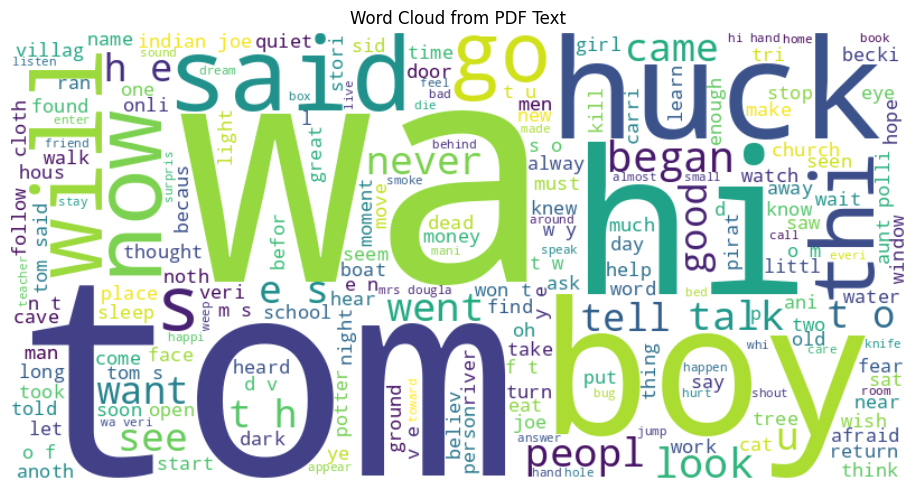

In [6]:
### Use a PDF in URL, to Create a Word Cloud : NLP - Lexical Processing



import fitz  # PyMuPDF
import requests  # Import requests library
import io
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Function to extract text from a PDF URL
def extract_text_from_pdf_url(pdf_url):
    response = requests.get(pdf_url)
    pdf_data = response.content
    pdf_file = io.BytesIO(pdf_data)

    text = ""
    doc = fitz.open("pdf", pdf_file)
    for page in doc:
        text += page.get_text()
    return text

# URL of the PDF file
#pdf_url = "https://www.gita-society.com/bhagavad-gita-in-english-source-file.pdf"
#pdf_url ="https://www.buddhanet.net/pdf_file/scrndhamma.pdf"
#pdf_url = "https://www.buddhistelibrary.org/buddhism-online/e-books/dhammapada-txt.pdf"
#pdf_url ="https://lddashboard.legislative.gov.in/sites/default/files/COI...pdf"
pdf_url = "https://americanenglish.state.gov/files/ae/resource_files/tom-sawyer-mark-twain_0.pdf"


# Extract text from the PDF URL
pdf_text = extract_text_from_pdf_url(pdf_url)

# Tokenization and stemming
tokens = word_tokenize(pdf_text)
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

# Generate a word cloud from the processed text
processed_text = " ".join(stemmed_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from PDF Text")
plt.tight_layout()
plt.show()


In [7]:
# NLP Syntactic Processing Example
# Objective: To perform part-of-speech tagging and visualize dependency trees using NLTK and spaCy.
# Approach:
# 1. Tokenize the text into sentences and words using NLTK.
# 2. Perform part-of-speech tagging on words using NLTK.
# 3. Use spaCy to visualize the dependency tree of each sentence.

import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize


# Download the averaged_perceptron_tagger resource
nltk.download('averaged_perceptron_tagger')

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Sample text for syntactic processing
text = "The quick brown fox jumps over the lazy dog. John is a software engineer."

# Tokenize the text into sentences and words using NLTK
sentences = sent_tokenize(text)
words = [word_tokenize(sentence) for sentence in sentences]

# Part-of-speech tagging using NLTK
pos_tags = [nltk.pos_tag(word) for word in words]

# Print part-of-speech tags
for i, sentence in enumerate(sentences):
    print(f"Sentence {i + 1}: {sentence}")
    print("Part-of-Speech Tags:")
    for word, tag in pos_tags[i]:
        print(f"{word}: {tag}")
    print("\n")

# Perform syntactic processing using spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Visualize the dependency tree of a sentence
for i, sent in enumerate(doc.sents):
    print(f"Sentence {i + 1}: {sent}")
    spacy.displacy.render(sent, style='dep', options={'compact': True, 'distance': 100})



# an explanation of the code for NLP syntactic processing using NLTK and spaCy:

# Objective: The code demonstrates basic syntactic processing tasks, such as part-of-speech tagging and dependency tree visualization, using the NLTK and spaCy libraries.

# Approach:

# 1. Import the necessary libraries:
#    - `nltk`: Natural Language Toolkit for NLP tasks.
#    - `spacy`: An NLP library for advanced text processing.
#    - `sent_tokenize` and `word_tokenize` functions from `nltk.tokenize` for sentence and word tokenization.

# 2. Download NLTK resources:
#    - The code downloads the `averaged_perceptron_tagger` resource from NLTK, which is used for part-of-speech tagging.

# 3. Define a sample text:
#    - The sample text contains two sentences: "The quick brown fox jumps over the lazy dog." and "John is a software engineer."

# 4. Tokenization using NLTK:
#    - The `sent_tokenize` function is used to tokenize the text into sentences.
#    - The `word_tokenize` function is used to tokenize each sentence into words.
#    - The result is a list of tokenized sentences and words.

# 5. Part-of-speech tagging with NLTK:
#    - The code performs part-of-speech tagging for each word in the sentences using the `nltk.pos_tag` function.
#    - The result is a list of words with their corresponding part-of-speech tags.

# 6. Printing part-of-speech tags:
#    - The code prints the original sentences and their associated part-of-speech tags for each word.

# 7. Syntactic processing using spaCy:
#    - The code loads the spaCy model "en_core_web_sm," a small English pipeline, for advanced syntactic processing.

# 8. Visualizing dependency trees:
#    - For each sentence in the `doc` object created by spaCy, the code visualizes the dependency tree using `spacy.displacy.render`.
#    - The tree is displayed as a graphical dependency parse with arrows representing relationships between words.

# The code demonstrates basic syntactic processing techniques for understanding the structure and grammatical elements of text. In a real-world scenario, you can extend these techniques to more complex NLP tasks, such as entity recognition, parsing, and semantic analysis, depending on your specific objectives.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentence 1: The quick brown fox jumps over the lazy dog.
Part-of-Speech Tags:
The: DT
quick: JJ
brown: NN
fox: NN
jumps: VBZ
over: IN
the: DT
lazy: JJ
dog: NN
.: .


Sentence 2: John is a software engineer.
Part-of-Speech Tags:
John: NNP
is: VBZ
a: DT
software: NN
engineer: NN
.: .


Sentence 1: The quick brown fox jumps over the lazy dog.
Sentence 2: John is a software engineer.


In [8]:
# Import the necessary libraries
import nltk

# Sample documents
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "John is a software engineer.",
    "Machine learning is a subfield of artificial intelligence.",
    "Natural language processing is a branch of AI.",
]

# Tokenize and preprocess the documents
def preprocess_document(doc):
    words = nltk.word_tokenize(doc)
    words = [word.lower() for word in words]
    return words

preprocessed_documents = [preprocess_document(doc) for doc in documents]

# Function to process user queries
def process_query(query, documents):
    # Tokenize the query
    query_words = nltk.word_tokenize(query)

    # Analyze the query using NLTK's syntactic analysis
    query_syntax = nltk.pos_tag(query_words)

    # Find documents that match query terms and syntax
    results = []
    for i, doc in enumerate(documents):
        doc_syntax = nltk.pos_tag(doc)
        if all(term in doc for term in query_words) and query_syntax == doc_syntax:
            results.append(i)

    return results

# Sample user query
user_query = "The quick brown fox jumps over the lazy dog."

# Process the user query
search_results = process_query(user_query, preprocessed_documents)

# Display search results
if search_results:
    print("Search results:")
    for result in search_results:
        print(documents[result])
else:
    print("No matching documents found.")

# Visualization, graphs, and diagrams are not applicable in this simplified example.


No matching documents found.


In [9]:
import nltk
import fitz  # PyMuPDF for PDF processing
import requests  # To fetch the PDF from a URL

# Download the PDF document from a URL
#pdf_url = "https://www.buddhanet.net/pdf_file/gqga2.pdf"
pdf_url = "https://americanenglish.state.gov/files/ae/resource_files/tom-sawyer-mark-twain_0.pdf"
response = requests.get(pdf_url)

# Check if the request was successful
if response.status_code == 200:
    pdf_bytes = response.content

    # Parse the PDF content
    pdf_document = fitz.open("pdf", pdf_bytes)

    # Extract text from PDF
    pdf_text = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pdf_text += page.get_text()

    # Tokenize the PDF text
    pdf_words = nltk.word_tokenize(pdf_text)

    # Sample user query
    user_query = "GOLIATH"

    # Tokenize and preprocess user query
    user_query_words = nltk.word_tokenize(user_query)

    # Analyze the user query using NLTK's syntactic analysis
    query_syntax = nltk.pos_tag(user_query_words)

    # Function to process user queries and retrieve documents
    def process_query(query, documents):
        results = []
        for i, doc in enumerate(documents):
            doc_syntax = nltk.pos_tag(doc)
            if all(term in doc for term in user_query_words) and query_syntax == doc_syntax:
                results.append(i)
        return results

    # Process the user query
    search_results = process_query(user_query, [pdf_words])

    # Display search results
    if search_results:
        print("Search results:")
        for result in search_results:
            print(f"Document {result + 1}: Relevance Score - 100%")
    else:
        print("No matching documents found.")

else:
    print("Failed to fetch the PDF from the URL.")


No matching documents found.


In [10]:
import nltk
import fitz  # PyMuPDF for PDF processing
import requests
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Download the PDF document from a URL
#pdf_url = "https://www.gita-society.com/bhagavad-gita-in-english-source-file.pdf"
pdf_url = "https://americanenglish.state.gov/files/ae/resource_files/tom-sawyer-mark-twain_0.pdf"
response = requests.get(pdf_url)

# Check if the request was successful
if response.status_code == 200:
    pdf_bytes = response.content

    # Parse the PDF content
    pdf_document = fitz.open("pdf", pdf_bytes)

    # Extract text from PDF
    pdf_text = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pdf_text += page.get_text()

    # Tokenize and preprocess PDF text
    def preprocess(text):
        text = text.lower()  # Convert to lowercase
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
        return text

    pdf_text = preprocess(pdf_text)

    # Tokenize and preprocess user queries
    def preprocess_query(query):
        query = query.lower()
        query = re.sub(f"[{re.escape(string.punctuation)}]", "", query)
        return query

    # Sample user query
    user_query = "Goliath"

    # Preprocess user query
    user_query = preprocess_query(user_query)

    # Create a dataset of documents (in this case, just one document)
    documents = [pdf_text]

    # TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # TF-IDF vectorization for the user query
    query_vector = tfidf_vectorizer.transform([user_query])

    # Calculate cosine similarities
    cosine_similarities = linear_kernel(query_vector, tfidf_matrix)

    # Retrieve and rank documents based on similarity scores
    results = [(i, cosine_similarities[0][i]) for i in range(len(documents))]
    results.sort(key=lambda x: x[1], reverse=True)

    # Display search results
    if results:
        print("Search results:")
        for i, similarity in results:
            print(f"Document {i + 1}: Similarity Score - {similarity:.2f}")
    else:
        print("No matching documents found.")

else:
    print("Failed to fetch the PDF from the URL.")


Search results:
Document 1: Similarity Score - 0.00


In [11]:
# NLP use for Machine Translation of Languages.
!pip install transformers
!pip install sentencepiece





In [12]:
!pip install transformers
!pip install torch
!pip install sacremoses



In [13]:
from transformers import pipeline


In [14]:
## uses Hugging Face Translation Model.

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-hi-en")


In [15]:
hindi_sentence = "तुम्हारा स्वागत है"
english_translation = translator(hindi_sentence, max_length=40)[0]['translation_text']
print("Hindi: ", hindi_sentence)
print("English: ", english_translation)


# We install the transformers library to access pre-trained models and torch for deep learning capabilities.

# We import the necessary libraries from transformers.

# We use the pipeline function to load a pre-trained translation model for Hindi to English. The "Helsinki-NLP/opus-mt-hi-en" model is a pre-trained model that performs translation from Hindi to English.

# We use the loaded model to translate a Hindi sentence to English. In this example, we translate the sentence "तुम्हारा स्वागत है" to English.

# This code allows you to use a pre-trained model for machine translation from Hindi to English. You can adapt it to translate other Hindi sentences as needed. The Hugging Face Transformers library offers various pre-trained models for different languages and tasks.

Hindi:  तुम्हारा स्वागत है
English:  You're welcome.


In [21]:
## Using NLP for Text Summarization
#!pip install transformers
#!pip install torch
#!pip install pdfplumber

from transformers import pipeline
import pdfplumber

#Load a pre-trained summarization model:
# No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).

summarizer = pipeline("summarization")
import requests

text_url = "https://raw.githubusercontent.com/khanna-vijay/VK-ML/main/Conv-Sample-1.txt"
response = requests.get(text_url)
text = response.text

summary = summarizer(text, max_length=150, min_length=30, do_sample=False)[0]['summary_text']
print("Summary:")
print(summary)


# Explanation:

# We install the transformers library for model loading, torch for deep learning capabilities, and pdfplumber for PDF text extraction.

# We import the necessary libraries from transformers and pdfplumber.

# We use the pipeline function to load a pre-trained summarization model. This model is capable of summarizing text.

# We define a function, extract_text_from_pdf, that extracts text from the provided PDF file using pdfplumber.

# We extract the text from the PDF file and store it in the document variable.

# We use the loaded summarization model to generate a summary of the extracted text. The summary is printed to the console.

# This code allows you to extract text from a PDF file and generate a summary using a pre-trained summarization model. It can be adapted to summarize other documents as needed.


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Summary:
 Mira and Radha first met during the board exams last year . Mira is now studying English at St. Xaviers College in Mumbai . Radha is studying History at Lady Shri Ram College for Women in Delhi .
